In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('final_raw.csv')

In [23]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2.0,NAME_FAMILY_STATUS_3.0
0,1,0,0,0,1,0.0,0.615,-0.198521,-0.011205,-0.224490,...,0,0,0,0.0,0.0,0,0,0,1,0
1,1,0,1,0,1,0.0,-0.385,0.865982,0.120269,0.571429,...,0,0,0,0.0,0.5,0,0,0,0,1
2,1,0,0,0,1,0.0,0.615,1.262506,0.560259,0.918367,...,0,0,0,0.0,1.5,1,0,0,0,0
3,1,0,1,0,0,0.0,-0.135,-0.417076,-0.478337,-0.479592,...,0,0,0,0.0,0.5,0,0,0,0,0
4,1,0,1,0,1,0.0,-0.735,-0.485530,-0.570468,-0.448980,...,0,0,0,0.0,-0.5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,0,1,0,1,0.0,-0.385,-0.535656,-0.157869,-0.510204,...,0,0,0,0.0,-0.5,0,1,0,1,0
307503,0,0,0,0,0,0.0,0.115,-0.480518,0.146912,-0.510204,...,0,0,0,0.0,0.0,0,0,0,0,1
307504,0,0,1,0,1,0.0,-0.835,-0.452949,-0.713894,-0.510204,...,0,0,0,0.0,0.0,0,1,0,0,1
307505,0,0,1,0,1,0.0,0.065,0.304712,0.280876,0.306122,...,0,0,0,1.0,0.0,0,0,0,0,1


In [34]:
def plot_correlation_matrix(df):
    """
    데이터프레임의 상관행렬을 히트맵으로 시각화하는 함수
    
    Parameters:
    df (pandas.DataFrame): 분석할 데이터프레임
    """
    # 상관행렬 계산
    corr_matrix = df.corr()
    
    # 그림 크기 설정 (데이터 크기에 따라 자동 조정)
    plt.figure(figsize=(20, 20))
    
    # 히트맵 그리기
    sns.heatmap(corr_matrix,
                annot=True,  # 상관계수 표시
                cmap='coolwarm',  # 색상 맵
                vmin=-1, vmax=1,  # 상관계수 범위
                center=0,  # 중앙값
                fmt='.2f',  # 소수점 둘째자리까지
                square=True,  # 정사각형 형태
                cbar_kws={'label': 'Correlation Coefficient'})
    
    # 제목 설정
    plt.title('Correlation Matrix', pad=20, size=15)
    
    # x축 레이블 회전
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)
    
    # 레이아웃 조정
    plt.tight_layout()
    
    # 그래프 표시
    plt.show()

# 사용 예시:
# plot_correlation_matrix(df)

In [12]:
df2 = df.drop(columns=df.columns[df.columns.str.contains('FLAG')])

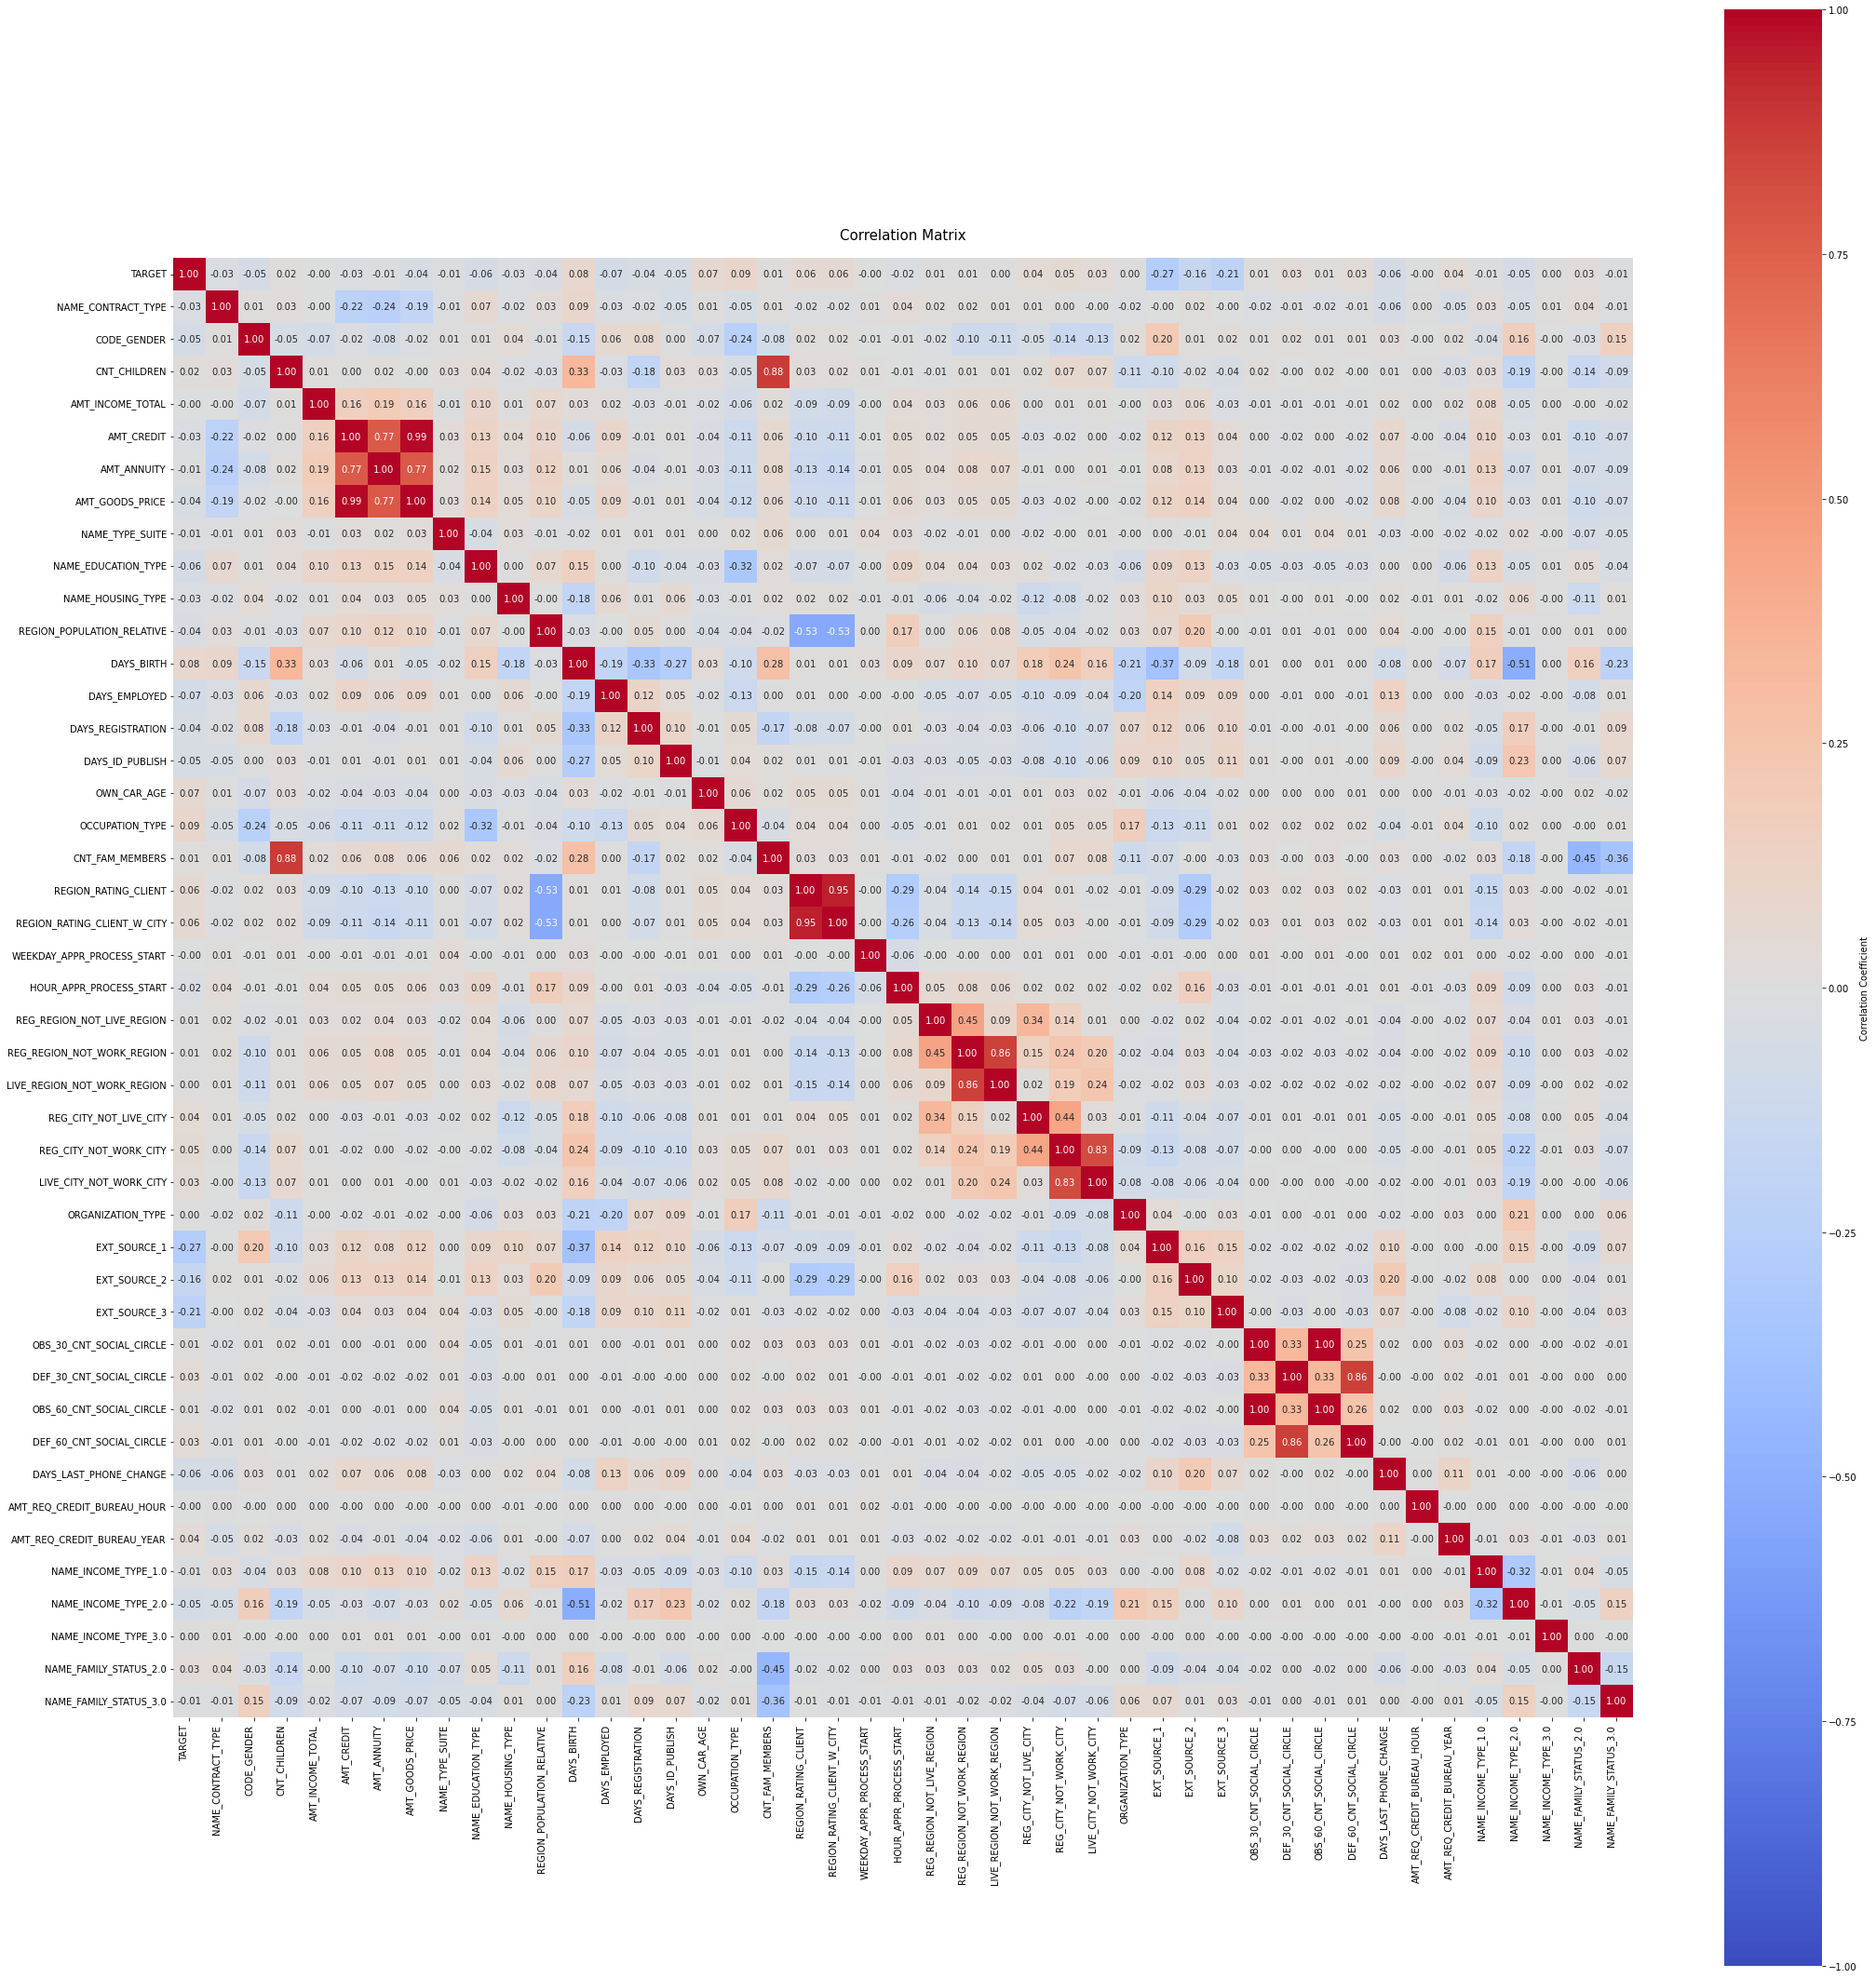

In [13]:
plot_correlation_matrix(df2)

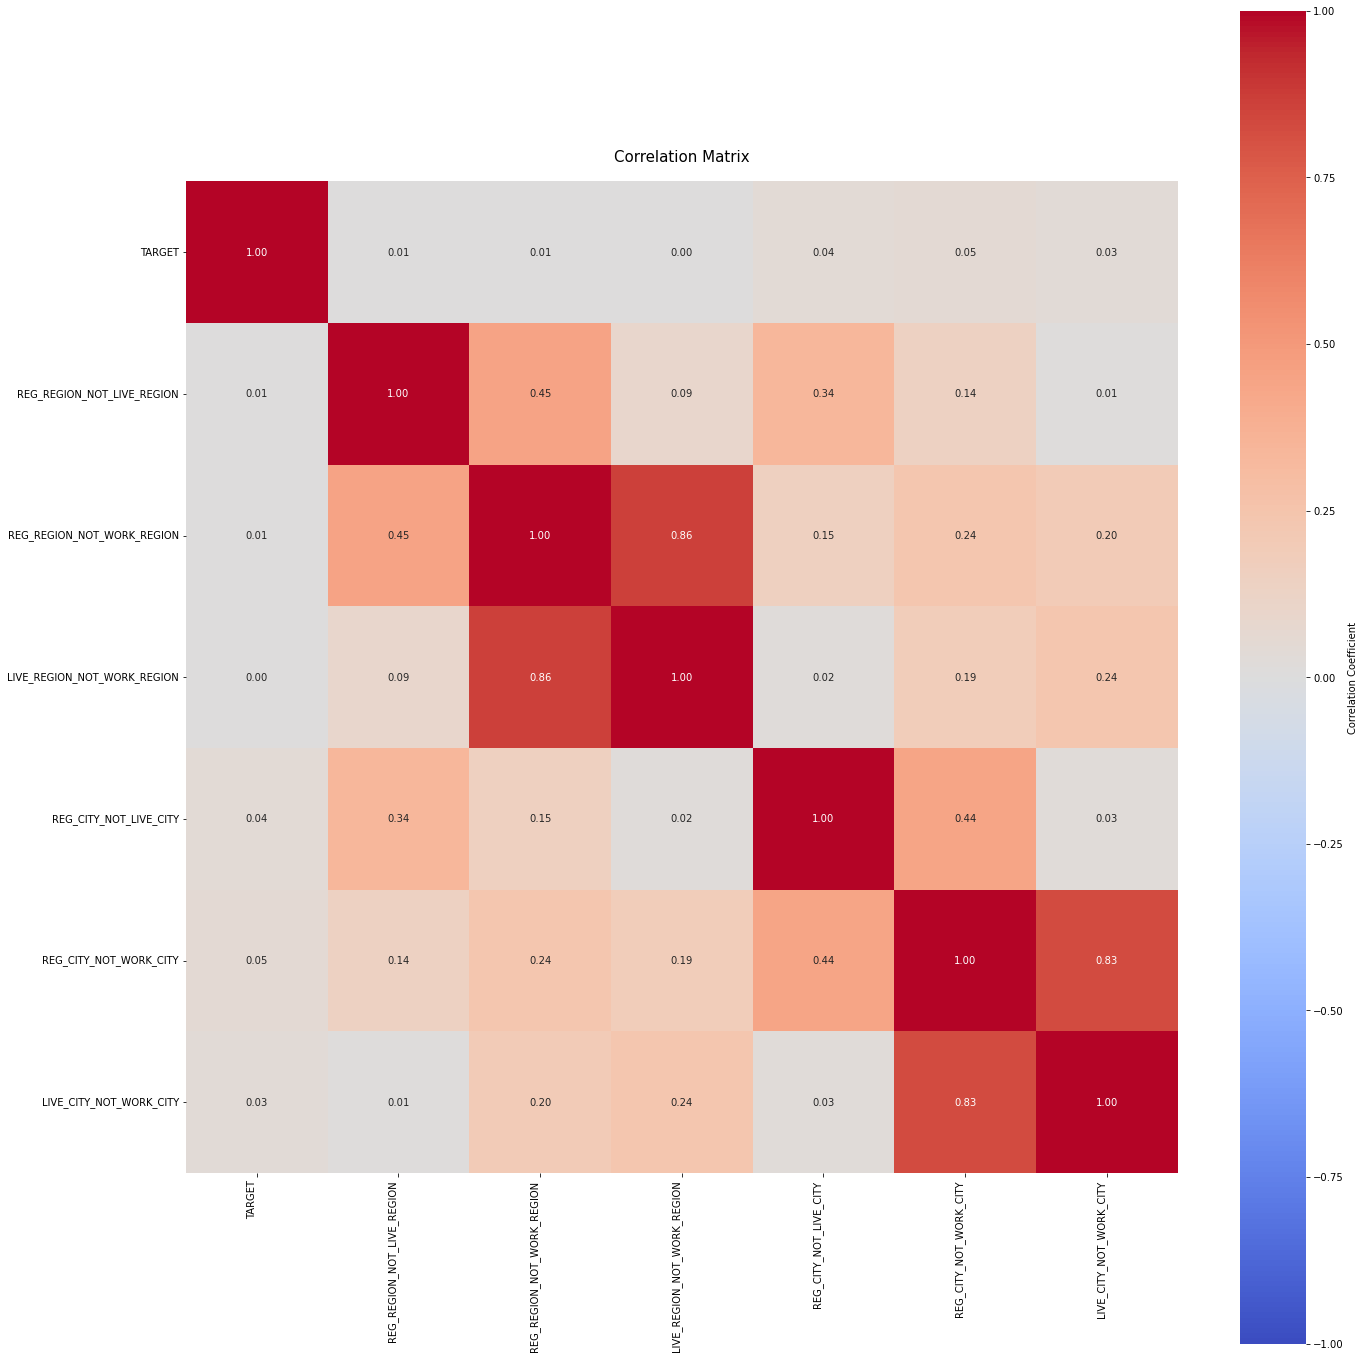

In [51]:
# 여러 단어 중 하나라도 포함된 열 선택 (OR 조건)
words = ['TARGET', 'REG_REGION', 'LIVE_REGION', 'REG_CITY', 'LIVE_CITY']
pattern = '|'.join(words)  # 'WORD1|WORD2|WORD3'
columns_with_words = df.columns[df.columns.str.contains(pattern)]
df_selected = df[columns_with_words]
plot_correlation_matrix(df_selected)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from tqdm import tqdm

def calculate_vif(df):
    """
    Calculate VIF for all features in dataframe with progress bar
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    
    Returns:
    pandas.DataFrame: VIF scores sorted in descending order
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    
    # Calculate VIF with progress bar
    vif_values = []
    for i in tqdm(range(df.shape[1]), desc="Calculating VIF"):
        vif_values.append(variance_inflation_factor(df.values, i))
    
    vif_data["VIF"] = vif_values
    
    # Sort by VIF value in descending order
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    # Add interpretation
    def interpret_vif(value):
        if value < 5:
            return "Low"
        elif value < 10:
            return "Moderate"
        else:
            return "High"
    
    vif_data["Multicollinearity"] = vif_data["VIF"].apply(interpret_vif)
    
    return vif_data

def print_vif_analysis(vif_data):
    """Print VIF analysis with recommendations"""
    print("\nVIF Analysis Results:")
    print("=" * 60)
    print(vif_data.to_string(index=False))
    print("\nInterpretation:")
    print("- VIF < 5: Low multicollinearity")
    print("- 5 ≤ VIF < 10: Moderate multicollinearity")
    print("- VIF ≥ 10: High multicollinearity (Consider removing)")
    
    high_vif = vif_data[vif_data["VIF"] >= 10]["Feature"].tolist()
    if high_vif:
        print("\nConsider removing these features with high multicollinearity:")
        for feature in high_vif:
            print(f"- {feature}")

In [27]:
independent = df.drop('TARGET', axis=1)

In [28]:
vif_results = calculate_vif(independent)

Calculating VIF:   6%|█▌                         | 4/70 [00:08<02:10,  1.97s/it]/Users/phr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
Calculating VIF: 100%|██████████████████████████| 70/70 [02:28<00:00,  2.13s/it]


In [29]:
print_vif_analysis(vif_results)


VIF Analysis Results:
                    Feature        VIF Multicollinearity
     NAME_FAMILY_STATUS_3.0        inf              High
     NAME_FAMILY_STATUS_2.0        inf              High
               CNT_CHILDREN        inf              High
            CNT_FAM_MEMBERS        inf              High
   OBS_30_CNT_SOCIAL_CIRCLE 448.264854              High
   OBS_60_CNT_SOCIAL_CIRCLE 448.251889              High
            AMT_GOODS_PRICE  45.535960              High
                 AMT_CREDIT  44.005641              High
             FLAG_EMP_PHONE  20.756435              High
            FLAG_DOCUMENT_3  20.039311              High
       REGION_RATING_CLIENT  10.825676              High
REGION_RATING_CLIENT_W_CITY  10.665901              High
     REG_CITY_NOT_WORK_CITY   9.762215          Moderate
 REG_REGION_NOT_WORK_REGION   9.550925          Moderate
          NAME_HOUSING_TYPE   9.190022          Moderate
LIVE_REGION_NOT_WORK_REGION   7.662796          Moderate
    LIVE

In [40]:
cycle2 = independent.drop(['CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'NAME_FAMILY_STATUS_3.0'
                          ,'NAME_FAMILY_STATUS_2.0'], axis=1)
vif_results = calculate_vif(cycle2)
print_vif_analysis(vif_results)

Calculating VIF: 100%|██████████████████████████| 65/65 [01:50<00:00,  1.71s/it]


VIF Analysis Results:
                    Feature       VIF Multicollinearity
            AMT_GOODS_PRICE 45.529549              High
                 AMT_CREDIT 44.004616              High
             FLAG_EMP_PHONE 20.698627              High
            FLAG_DOCUMENT_3 19.808560              High
       REGION_RATING_CLIENT 10.824515              High
REGION_RATING_CLIENT_W_CITY 10.662476              High
     REG_CITY_NOT_WORK_CITY  9.760379          Moderate
 REG_REGION_NOT_WORK_REGION  9.550702          Moderate
          NAME_HOUSING_TYPE  9.171275          Moderate
LIVE_REGION_NOT_WORK_REGION  7.662685          Moderate
    LIVE_CITY_NOT_WORK_CITY  7.354212          Moderate
                CODE_GENDER  3.831019               Low
            FLAG_OWN_REALTY  3.667965               Low
       NAME_INCOME_TYPE_2.0  3.570454               Low
         NAME_CONTRACT_TYPE  3.289813               Low
            FLAG_DOCUMENT_6  3.242263               Low
            FLAG_DOCUMENT